<a href="https://colab.research.google.com/github/mihreteab-ak/FUTURE_ML_01/blob/main/FUTURE_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import modules and csv file

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('/content/drive/MyDrive/Sample - Superstore.csv', encoding='latin-1')
print(df.head())
print(df.shape)

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

convert dates and clean sales

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = pd.to_numeric(df['Sales']).fillna(0.0)

create time series

In [4]:
ts = df.set_index('Order Date')
ts = ts.resample('M')
ts = ts['Sales'].sum().asfreq('M')
ts = ts.fillna(0.0)

ts.head()

/tmp/ipython-input-265315281.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = ts.resample('M')
/tmp/ipython-input-265315281.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = ts['Sales'].sum().asfreq('M')


,Sales
Order Date,
2014-01-31,14236.895
2014-02-28,4519.892
2014-03-31,55691.009
2014-04-30,28295.345
2014-05-31,23648.287


plot timeseries

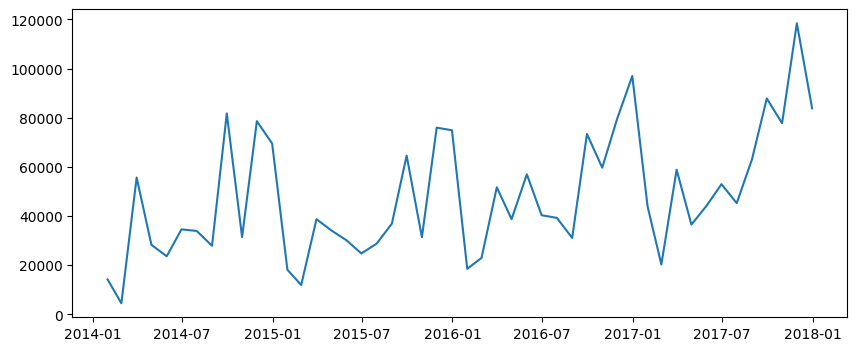

In [5]:
plt.figure(figsize=(10,4))
plt.plot(ts.index, ts.values)
plt.show()


create lag features

In [6]:
ts_data = pd.DataFrame(ts)
ts_data['lag1'] = ts_data['Sales'].shift(1)
ts_data['lag2'] = ts_data['Sales'].shift(2)
ts_data['lag3'] = ts_data['Sales'].shift(3)
ts_data['lag12'] = ts_data['Sales'].shift(12)
ts_data.head(15)

,Sales,lag1,lag2,lag3,lag12
Order Date,,,,,
2014-01-31,14236.8950,NaN,NaN,NaN,NaN
2014-02-28,4519.8920,14236.8950,NaN,NaN,NaN
2014-03-31,55691.0090,4519.8920,14236.8950,NaN,NaN
2014-04-30,28295.3450,55691.0090,4519.8920,14236.8950,NaN
2014-05-31,23648.2870,28295.3450,55691.0090,4519.8920,NaN
2014-06-30,34595.1276,23648.2870,28295.3450,55691.0090,NaN
2014-07-31,33946.3930,34595.1276,23648.2870,28295.3450,NaN
2014-08-31,27909.4685,33946.3930,34595.1276,23648.2870,NaN
2014-09-30,81777.3508,27909.4685,33946.3930,34595.1276,NaN


add calendar features and drop missing rows

In [7]:
ts_data['month'] = ts_data.index.month
ts_data['year'] = ts_data.index.year

ts_data = ts_data.dropna()
data = ts_data.copy()
data.head()

,Sales,lag1,lag2,lag3,lag12,month,year
Order Date,,,,,,,
2015-01-31,18174.0756,69545.6205,78628.7167,31453.3930,14236.895,1,2015
2015-02-28,11951.4110,18174.0756,69545.6205,78628.7167,4519.892,2,2015
2015-03-31,38726.2520,11951.4110,18174.0756,69545.6205,55691.009,3,2015
2015-04-30,34195.2085,38726.2520,11951.4110,18174.0756,28295.345,4,2015
2015-05-31,30131.6865,34195.2085,38726.2520,11951.4110,23648.287,5,2015


train/test split

In [8]:
test_months = 6

train = data.iloc[:-test_months]
test = data.iloc[-test_months:]

X_train = train.drop('Sales', axis=1)
y_train = train['Sales']

X_test = test.drop('Sales', axis=1)
y_test = test['Sales']

print(X_train.shape, X_test.shape)

(30, 6) (6, 6)


train the model

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

error analysis

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MSE: 398528240.86
MAE: 16561.98
RMSE: 19963.17


forecast for the next year

In [11]:
future_months = 12

current = data.copy()
future = []

for i in range(future_months):
  idx = current.index[-1] + pd.DateOffset(months=1)
  features = {
      'lag1': current['Sales'].iloc[-1],
      'lag2': current['Sales'].iloc[-2],
      'lag3': current['Sales'].iloc[-3],
      'lag12': current['Sales'].iloc[-12],
      'month': idx.month,
      'year': idx.year
  }
  features_df = pd.DataFrame(features, index=[idx])
  prediction = model.predict(features_df)[0]

  new_prediction = features_df.copy()
  new_prediction['Sales'] = prediction
  current = pd.concat([current, new_prediction])
  future.append(new_prediction)

future_df = pd.concat(future)
future_df.head()

,lag1,lag2,lag3,lag12,month,year,Sales
2018-01-31,83829.318800,118447.825000,77776.923200,43971.3740,1,2018,41286.735635
2018-02-28,41286.735635,83829.318800,118447.825000,20301.1334,2,2018,32948.031911
2018-03-28,32948.031911,41286.735635,83829.318800,58872.3528,3,2018,49609.710697
2018-04-28,49609.710697,32948.031911,41286.735635,36521.5361,4,2018,37516.276485
2018-05-28,37516.276485,49609.710697,32948.031911,44261.1102,5,2018,48845.950273


show the forcast alone and with previous data

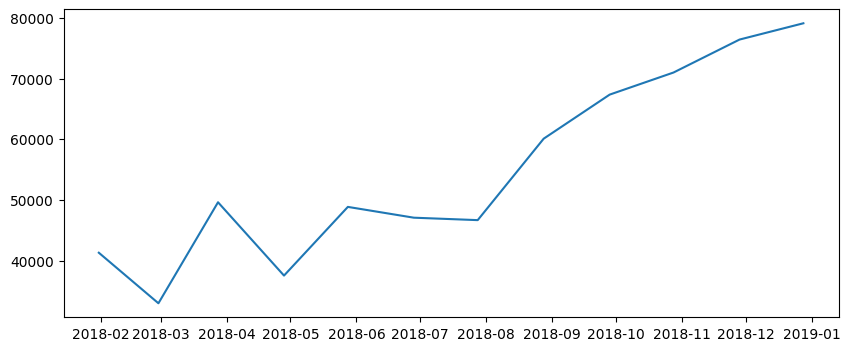

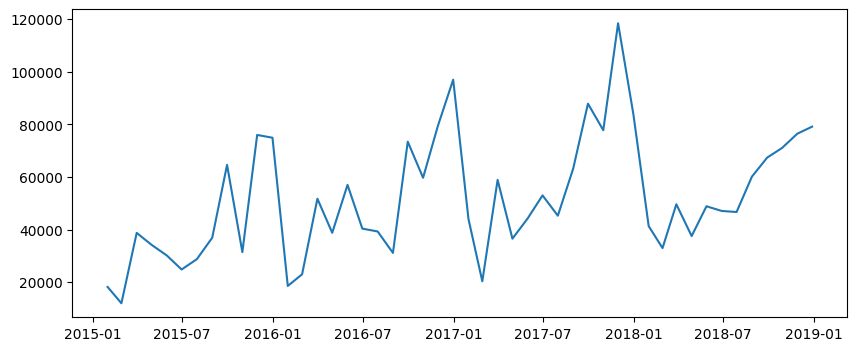

In [12]:
plt.figure(figsize=(10,4))
plt.plot(future_df.index, future_df['Sales'])
plt.show()

plt.figure(figsize=(10,4))
plt.plot(current.index, current['Sales'])
plt.show()

## Observations

Overall upward trend: Sales are increasing over time, which suggests the business is growing (more customers, better market penetration, or expanding operations).

Regular end-of-year spikes: Sales consistently peak in the final months of each year, indicating strong seasonality. This is likely driven by holidays, promotions, budget cycles, or year-end demand.

This pattern appears repeated every year, which means it’s not random noise, it’s predictable behavior.